Zadanie 1 i zadanie 2

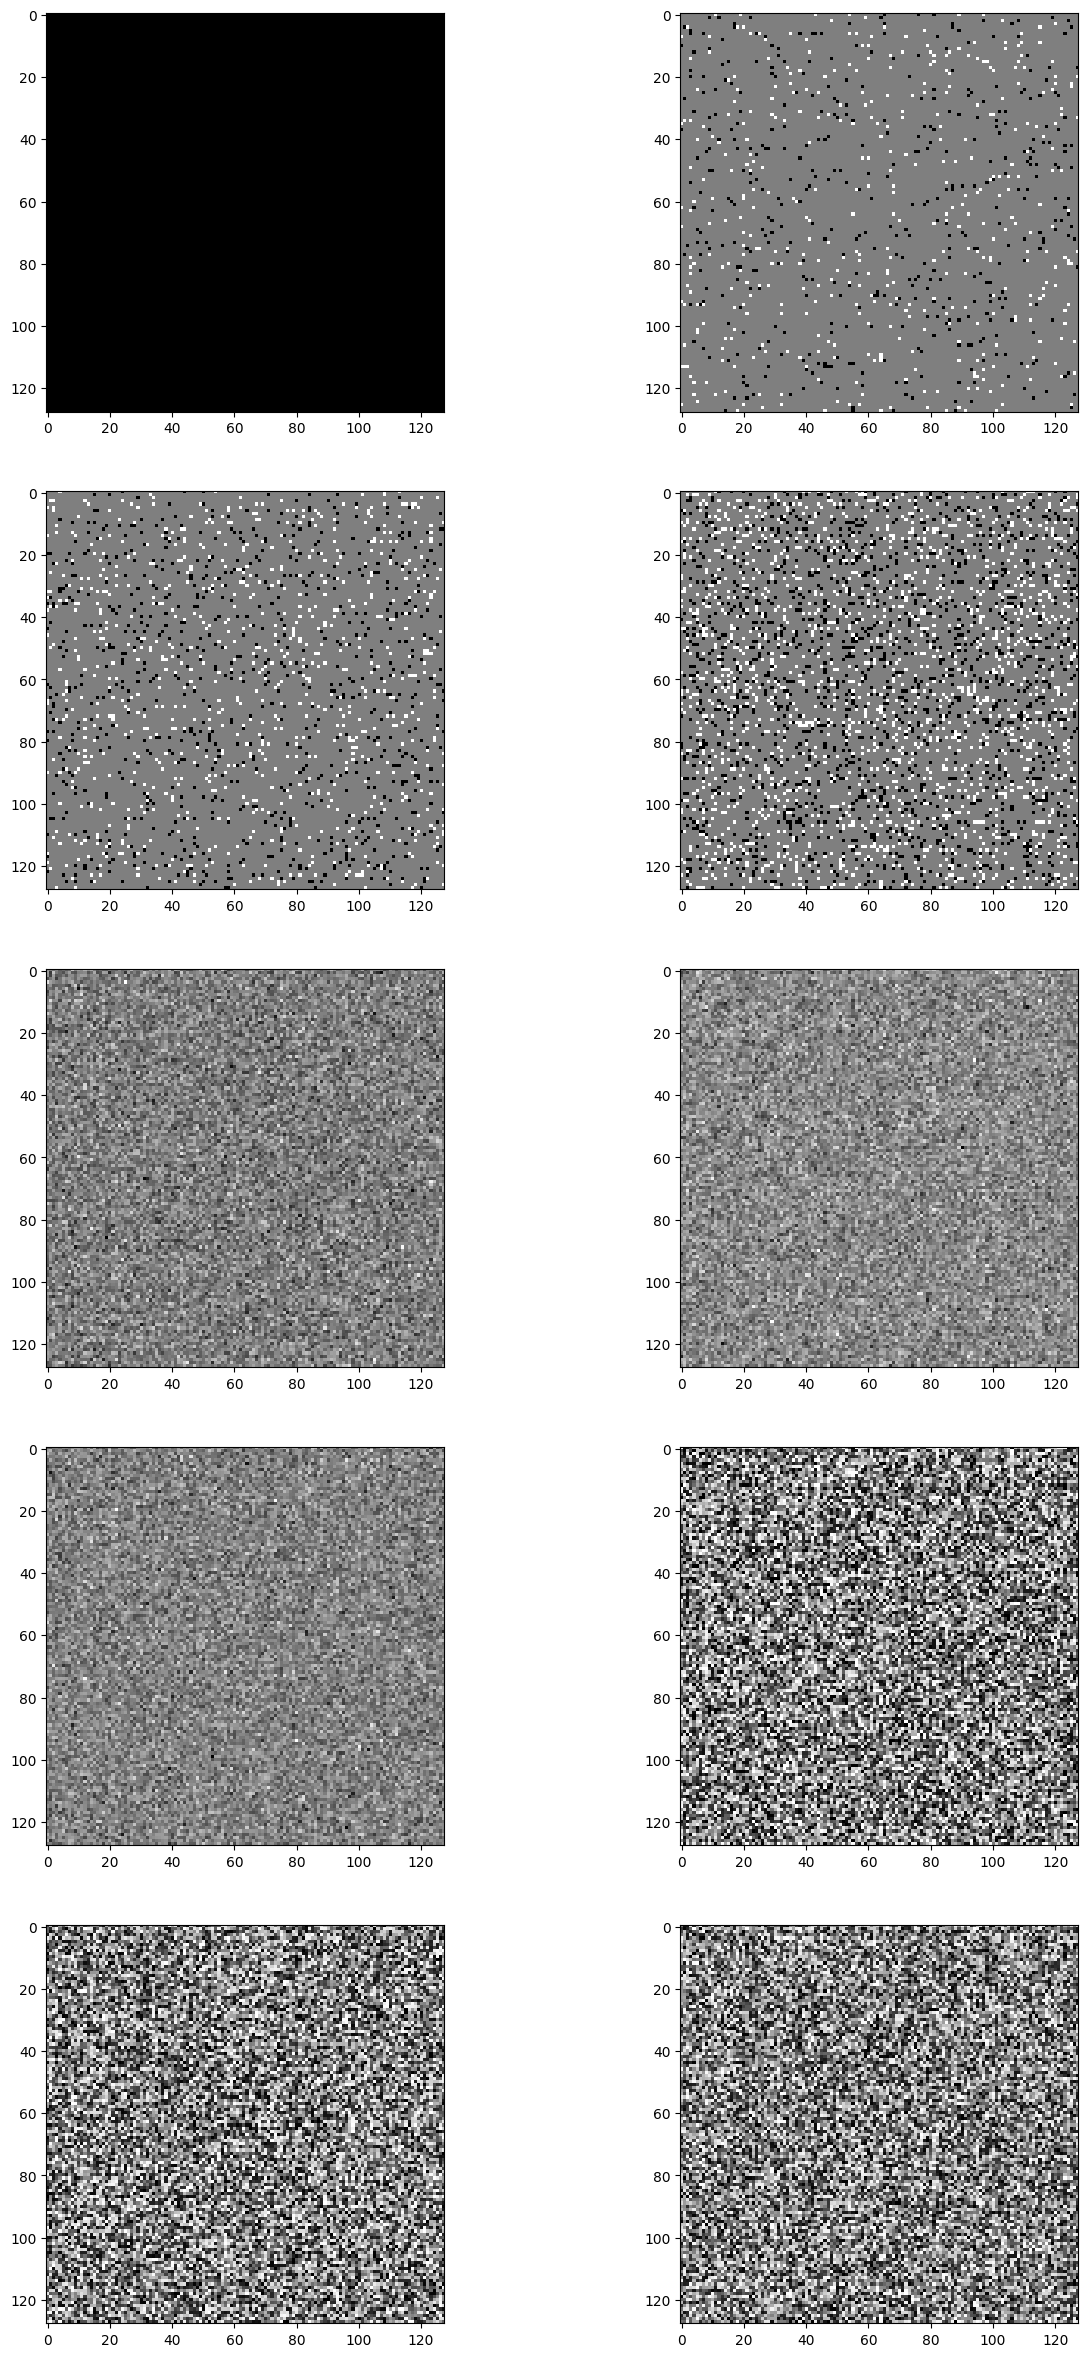

In [47]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import skimage

img = np.zeros((128, 128), np.uint8) + 127

plt.subplots(5, 2, figsize=(15, 30))

# Salt and pepper
noise_05 = skimage.util.random_noise(img, 's&p', amount=0.05)
noise_10 = skimage.util.random_noise(img, 's&p', amount=0.1)
noise_20 = skimage.util.random_noise(img, 's&p', amount=0.2)

gauss_05 = skimage.util.random_noise(image=img, var=0.05 * 0.05)
gauss_08 = skimage.util.random_noise(image=img, var=0.08 * 0.08)
gauss_10 = skimage.util.random_noise(image=img, var=0.1 * 0.1)

mask_10 = np.random.uniform(-10, 10, img.shape)
mask_20 = np.random.uniform(-20, 20, img.shape)
mask_40 = np.random.uniform(-40, 40, img.shape)

img_uniform_10 = np.clip(img + mask_10, 0, 255).astype(np.uint8)
img_uniform_20 = np.clip(img + mask_20, 0, 255).astype(np.uint8)
img_uniform_40 = np.clip(img + mask_40, 0, 255).astype(np.uint8)

plt.subplot(5, 2, 1)
plt.imshow(img, cmap='gray')
plt.subplot(5, 2, 2)
plt.imshow(noise_05, cmap='gray')
plt.subplot(5, 2, 3)
plt.imshow(noise_10, cmap='gray')
plt.subplot(5, 2, 4)
plt.imshow(noise_20, cmap='gray')
plt.subplot(5, 2, 5)
plt.imshow(gauss_05, cmap='gray')
plt.subplot(5, 2, 6)
plt.imshow(gauss_08, cmap='gray')
plt.subplot(5, 2, 7)
plt.imshow(gauss_10, cmap='gray')
plt.subplot(5, 2, 8)
plt.imshow(img_uniform_10, cmap='gray')
plt.subplot(5, 2, 9)
plt.imshow(img_uniform_20, cmap='gray')
plt.subplot(5, 2, 10)
plt.imshow(img_uniform_40, cmap='gray')

In [48]:
def nmse(f, e):
    denominator = 0.0
    sum_over = 0.0
    for x in range(f.shape[0]):
        for y in range(f.shape[1]):
            sum_over += (f[x, y] - e[x, y]) ** 2
            denominator += f[x, y] ** 2
    return sum_over / denominator


from skimage.filters import median, gaussian
from skimage.filters.rank import mean

nmse_values = {
    "Rodzaj i wielkość szumu": ["S&P 5%", "S&P 10%", "S&P 20%", "Gausse 0.05", "Gausse 0.08", "Gausse 0.1",
                                "Uniform 10", "Uniform 20", "Uniform 40"],
    "NMSE(oryg, zaszum)": [nmse(img, noise_05), nmse(img, noise_10), nmse(img, noise_20), nmse(img, gauss_05),
                           nmse(img, gauss_08), nmse(img, gauss_10), nmse(img, img_uniform_10),
                           nmse(img, img_uniform_20), nmse(img, img_uniform_40), ],
    "NMSE(orgy, odszum) median": [nmse(img, median(noise_05, np.ones((3, 3)))),
                                  nmse(img, median(noise_10, np.ones((3, 3)))),
                                  nmse(img, median(noise_20, np.ones((3, 3)))),
                                  nmse(img, median(gauss_05, np.ones((3, 3)))),
                                  nmse(img, median(gauss_08, np.ones((3, 3)))),
                                  nmse(img, median(gauss_10, np.ones((3, 3)))),
                                  nmse(img, median(img_uniform_10, np.ones((3, 3)))),
                                  nmse(img, median(img_uniform_20, np.ones((3, 3)))),
                                  nmse(img, median(img_uniform_40, np.ones((3, 3)))), ],
    "NMSE(orgy, odszum) Gaussian": [nmse(img, gaussian(noise_05, sigma=0.75)),
                                    nmse(img, gaussian(noise_10, sigma=0.75)),
                                    nmse(img, gaussian(noise_20, sigma=0.75)),
                                    nmse(img, gaussian(gauss_05, sigma=0.75)),
                                    nmse(img, gaussian(gauss_08, sigma=0.75)),
                                    nmse(img, gaussian(gauss_10, sigma=0.75)),
                                    nmse(img, gaussian(img_uniform_10, sigma=0.75)),
                                    nmse(img, gaussian(img_uniform_20, sigma=0.75)),
                                    nmse(img, gaussian(img_uniform_40, sigma=0.75)), ],
    "NMSE(orgy, odszum) Mean": [nmse(img, mean(noise_05, np.ones((3, 3)))), nmse(img, mean(noise_10, np.ones((3, 3)))),
                                nmse(img, mean(noise_20, np.ones((3, 3)))), nmse(img, mean(gauss_05, np.ones((3, 3)))),
                                nmse(img, mean(gauss_08, np.ones((3, 3)))), nmse(img, mean(gauss_10, np.ones((3, 3)))),
                                nmse(img, mean(img_uniform_10, np.ones((3, 3)))),
                                nmse(img, mean(img_uniform_20, np.ones((3, 3)))),
                                nmse(img, mean(img_uniform_40, np.ones((3, 3))))]
}

data = pd.DataFrame(nmse_values)
print(data)

C:\Users\ddest\AppData\Local\Temp\ipykernel_22352\794845701.py:6: RuntimeWarning: overflow encountered in scalar subtract
  sum_over += (f[x, y] - e[x, y]) ** 2
C:\Program Files\Python312\Lib\site-packages\IPython\core\interactiveshell.py:3549: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  exec(code_obj, self.user_global_ns, self.user_ns)


  Rodzaj i wielkość szumu  NMSE(oryg, zaszum)  NMSE(orgy, odszum) median  \
0                  S&P 5%            0.992179                   0.992172   
1                 S&P 10%            0.992163                   0.992171   
2                 S&P 20%            0.992135                   0.992170   
3             Gausse 0.05            0.992173                   0.992176   
4             Gausse 0.08            0.992180                   0.992182   
5              Gausse 0.1            0.992158                   0.992165   
6              Uniform 10            1.754695                   1.485200   
7              Uniform 20            1.780899                   1.717415   
8              Uniform 40            1.712765                   1.775510   

   NMSE(orgy, odszum) Gaussian  NMSE(orgy, odszum) Mean  
0                     0.992178                 0.609677  
1                     0.992161                 0.918993  
2                     0.992132                 1.240297  
3      

Zadanie 3

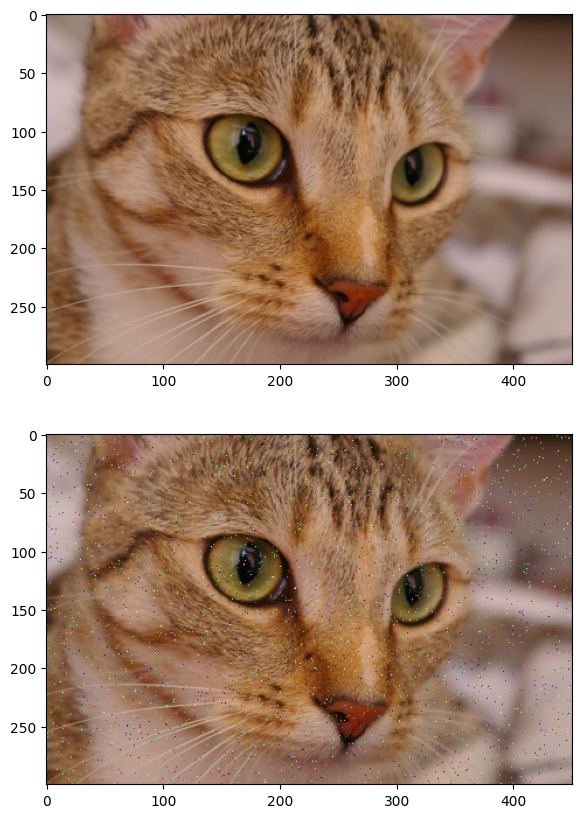

In [49]:
from random import randrange


def impulse_noise(img, percent):
    N = img.shape[0] * img.shape[1] * percent // 100
    new_img = img
    for i in range(N):
        x = randrange(0, img.shape[1])
        y = randrange(0, img.shape[0])
        R = randrange(0, 256)
        G = randrange(0, 256)
        B = randrange(0, 256)
        new_img[y, x] = (R,G,B)
    return new_img

chelsea = skimage.data.chelsea()
plt.subplots(2, 1,figsize = (10,10))
plt.subplot(2, 1, 1)
plt.imshow(chelsea)
plt.subplot(2, 1, 2)
chelsea_noise = impulse_noise(chelsea, 3)
plt.imshow(chelsea_noise)
plt.show()

Zadanie 4

In [50]:
def nmse_colored(img_color1,img_color2):
    img_color1 = img_color1.astype(np.float64)
    img_color2 = img_color2.astype(np.float64)
    return np.sum((img_color1-img_color2)**2)/np.sum(img_color1**2)
print(nmse_colored(chelsea,chelsea_noise))

0.0


Zadanie 5